# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from numpy import mean
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


# Read Data

In [5]:

sub = pd.read_csv('sub_example.csv')
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')


# **Training Data**

## EDA

In [6]:
"""
Checking Data Types
"""
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
"""
Data Describion, categorical features
"""
train.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,305723,305723,305723
unique,2,3,2
top,Male,1-2 Year,No
freq,164595,159977,158891


In [8]:
"""
Data Describion, numerical features
"""
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,234422.768922,38.527029,0.998106,26.427413,0.489878,30698.991479,111.927369,154.317362,0.163413
std,139493.010325,15.216020,0.043477,13.178366,0.499898,17060.104811,54.302872,83.708893,0.369742
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115055.000000,25.000000,1.000000,15.000000,0.000000,24533.500000,26.000000,82.000000,0.000000
50%,230662.000000,36.000000,1.000000,28.000000,0.000000,31685.000000,145.000000,154.000000,0.000000
75%,345313.500000,49.000000,1.000000,35.000000,1.000000,39425.000000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


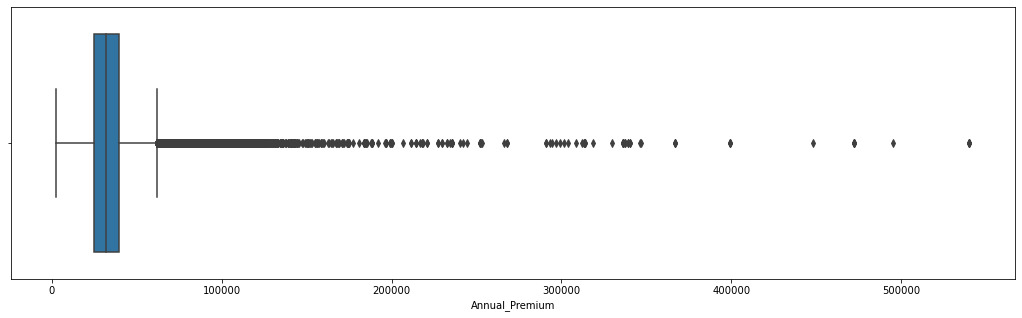

In [9]:
"""
Check features distribution
"""
plt.figure(figsize = (18, 5))
sns.boxplot(train.Annual_Premium)
plt.show()

In [10]:
"""
Damage for annual premium > 350000
"""
train.loc[(train['Annual_Premium'] > 350000)]['Vehicle_Damage'].value_counts()

Yes    11
No      5
Name: Vehicle_Damage, dtype: int64

In [11]:
"""
Previously insured for annual premium > 80000
"""
train.loc[(train['Annual_Premium'] > 80000)]['Previously_Insured'].value_counts()

0    1012
1     885
Name: Previously_Insured, dtype: int64

In [12]:
"""
Vehicle_Age for annual premium > 400000
"""
train.loc[(train['Annual_Premium'] > 400000)]['Vehicle_Age'].value_counts()

1-2 Year     7
< 1 Year     2
> 2 Years    1
Name: Vehicle_Age, dtype: int64

In [13]:
"""
Vehicle_Age values
"""
train.Vehicle_Age.value_counts()

1-2 Year     159977
< 1 Year     133237
> 2 Years     12509
Name: Vehicle_Age, dtype: int64

In [14]:
"""
Changing categorical columns to numerical
"""
gender = {'Male': 0, 'Female': 1}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
train['Gender'] = train['Gender'].map(gender)
train['Vehicle_Age'] = train['Vehicle_Age'].map(vehicle_age)
train['Vehicle_Damage'] = train['Vehicle_Damage'].map(vehicle_damage)

gender = {'Male': 0, 'Female': 1}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
test['Gender'] = test['Gender'].map(gender)
test['Vehicle_Age'] = test['Vehicle_Age'].map(vehicle_age)
test['Vehicle_Damage'] = test['Vehicle_Damage'].map(vehicle_damage)

In [15]:
"""
Describe Annual_Premium for Vehicle_Age == 2
"""
df_t2 = train.loc[((train['Vehicle_Age'] == 2))]
df_t2.describe()['Annual_Premium'].to_frame()

,Annual_Premium
count,12509.000000
mean,36197.538332
std,19722.793288
min,2630.000000
25%,28791.000000
50%,37886.000000
75%,46981.000000
max,448156.000000


In [16]:
"""
Describe Annual_Premium for Vehicle_Age == 1
"""
df_t1 = train.loc[((train['Vehicle_Age'] == 1))]
df_t1.describe()['Annual_Premium'].to_frame()

,Annual_Premium
count,159977.000000
mean,30601.641398
std,18351.362768
min,2630.000000
25%,23879.000000
50%,32449.000000
75%,40746.000000
max,540165.000000


In [17]:
"""
Describe Annual_Premium for Vehicle_Age == 1
"""
df_t0 = train.loc[((train['Vehicle_Age'] == 0))]
df_t0.describe()['Annual_Premium'].to_frame()

,Annual_Premium
count,133237.000000
mean,30299.646337
std,14964.801577
min,2630.000000
25%,24776.000000
50%,30553.000000
75%,37217.000000
max,540165.000000


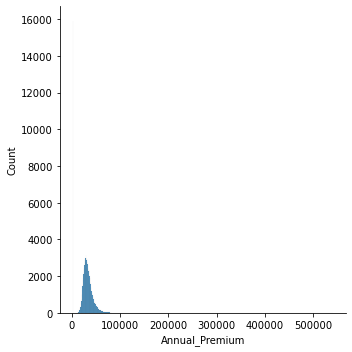

In [18]:
sns.displot(df_t0['Annual_Premium'])

In [19]:
"""
Exploring Annual_Premium for Vehicle_Age == 2, Annual_Premium == 2630
"""
train[((train['Annual_Premium'] == 2630) & (train['Vehicle_Age'] == 2))]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
106,140668,0,59,1,48.0,0,2,1,2630.0,26.0,62,0
155,256896,1,66,1,41.0,0,2,1,2630.0,157.0,253,0
236,278593,1,60,1,48.0,0,2,1,2630.0,26.0,276,0
297,16201,0,41,1,41.0,0,2,1,2630.0,26.0,193,0
516,111799,1,50,1,16.0,0,2,1,2630.0,124.0,274,1
...,...,...,...,...,...,...,...,...,...,...,...,...
305482,303911,1,74,1,7.0,0,2,1,2630.0,26.0,51,0
305534,445551,0,63,1,41.0,0,2,1,2630.0,26.0,10,1
305559,323655,0,57,1,8.0,0,2,1,2630.0,7.0,248,1
305615,143925,1,51,1,0.0,0,2,1,2630.0,124.0,249,0


<Figure size 720x1080 with 0 Axes>

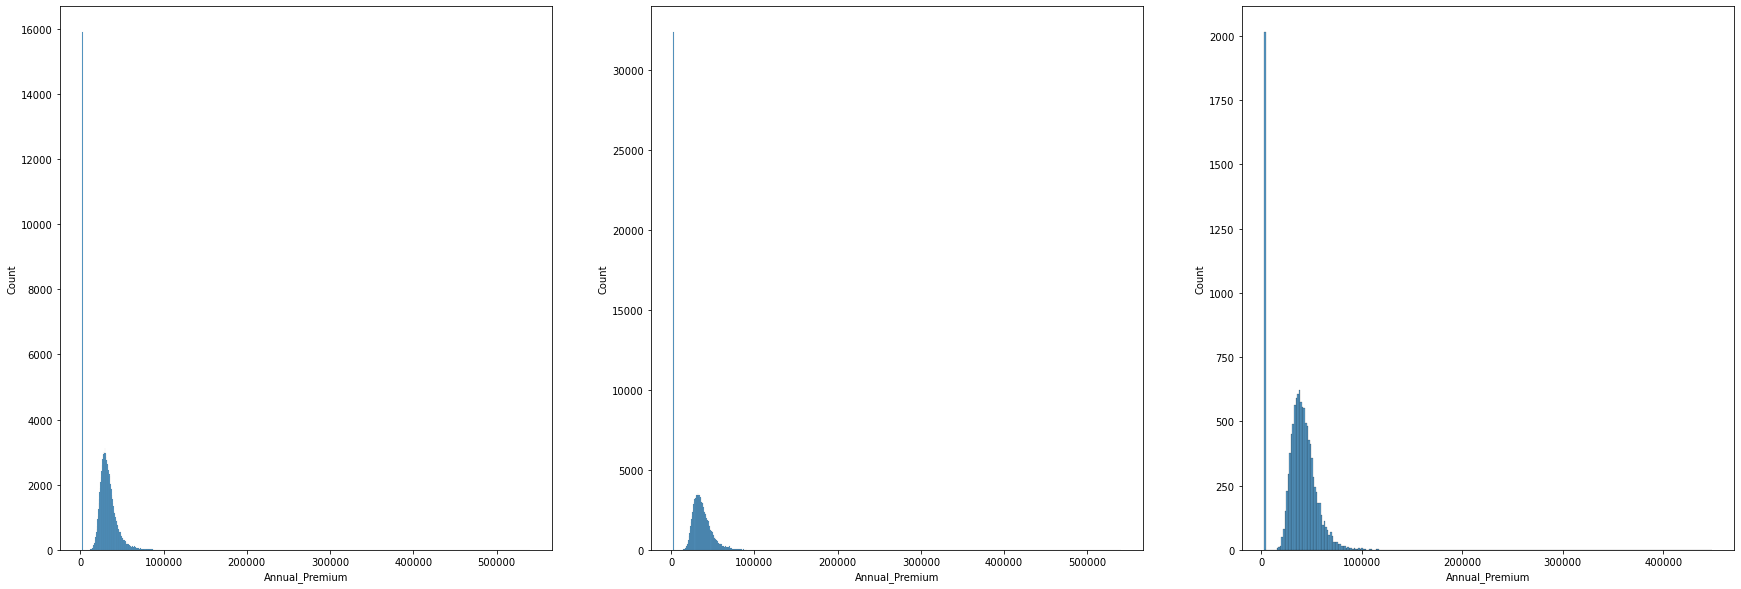

In [20]:
"""
Exploring Annual_Premium for Vehicle_Age == 2, 1 ,0
"""
plt.figure(figsize = (10,15))
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3 , figsize = (30,10))
sns.histplot(df_t0['Annual_Premium'] , ax = ax1)
sns.histplot(df_t1['Annual_Premium'] , ax = ax2)
sns.histplot(df_t2['Annual_Premium'] , ax = ax3)
plt.show()

In [21]:
"""
Checking which category(male or female) causes accidents more :D
"""
index =train['Vehicle_Damage'].value_counts().index
values=train['Vehicle_Damage'].value_counts().values
pd.crosstab(train['Gender'] ,train['Vehicle_Damage'] , margins = True)#.plot(kind = 'bar')

Vehicle_Damage,0,1,All
Gender,,,
0,77843,86752,164595
1,81048,60080,141128
All,158891,146832,305723


In [22]:
"""
Checking nans
"""
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<AxesSubplot:>

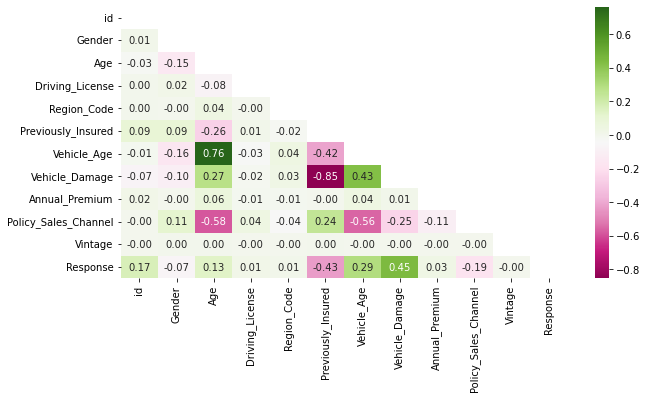

In [23]:
"""
Show Data Correlation
"""
plt.figure(figsize = (10,5))
corr = train.corr()
matrix = np.triu(corr)
sns.heatmap(corr , annot = True,fmt = '.2f', cmap = "PiYG" , mask = matrix)

In [27]:
"""
Checking Data Balancing 
"""
print(train.Response.value_counts())


0    255764
1     49959
Name: Response, dtype: int64


In [25]:
"""
Checking all columns values
"""
for col in train.columns:
    print(train[col].value_counts())

380337    1
144076    1
58750     1
274532    1
138499    1
         ..
505169    1
36009     1
418443    1
366368    1
109107    1
Name: id, Length: 305723, dtype: int64
0    164595
1    141128
Name: Gender, dtype: int64
24    21103
23    19498
25    16794
22    16584
21    12644
      ...  
81       45
82       28
83       22
84       11
85       10
Name: Age, Length: 66, dtype: int64
1    305144
0       579
Name: Driving_License, dtype: int64
28.0    85725
8.0     27105
46.0    16126
41.0    15339
15.0    10480
30.0    10268
29.0     9362
50.0     8150
3.0      7464
11.0     7439
36.0     6919
33.0     6412
47.0     5840
35.0     5824
6.0      5222
45.0     4445
18.0     4324
37.0     4025
14.0     3884
39.0     3596
10.0     3565
21.0     3533
48.0     3448
13.0     3249
2.0      2932
7.0      2622
12.0     2513
9.0      2345
32.0     2172
43.0     2089
27.0     2011
17.0     1998
25.0     1989
26.0     1934
24.0     1887
38.0     1650
23.0     1583
16.0     1577
4.0      1466
0.0 

C:\Users\DELL\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


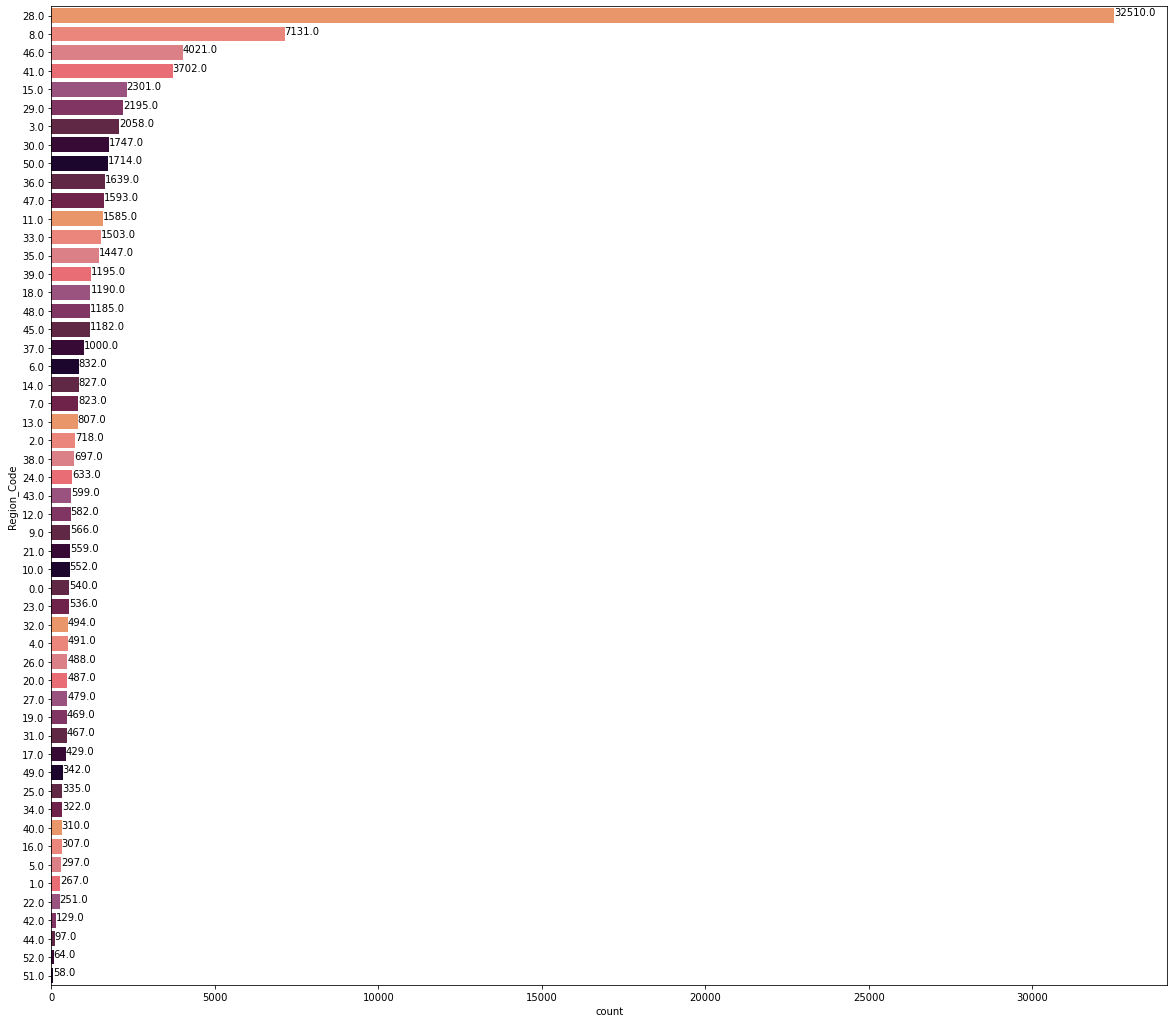

In [28]:
'''
Drawing bar plot for number of men have damaged their cars among regions
'''
df_t1 = train.loc[((train['Gender'] == 0) & (train['Vehicle_Damage'] == 1))]
df_t1.dropna( subset = ['Region_Code'] , inplace = True)
plt.figure(figsize = (20,18))
regions_List = sorted(list(df_t1['Region_Code'].value_counts()), reverse= True)
ax = sns.countplot( y = 'Region_Code', order = df_t1['Region_Code'].value_counts().index , data = df_t1, palette = ["#fe9055" , "#fe766a" , "#eb717c" , "#fe5862" , "#a54780" , "#8d2865" ,  "#6b1e47" , "#3d033b" , "#1e0034","#6b1e47" ,"#7b174a"] )
for p in ax.patches:
        percentage = '{:.1f}'.format( p.get_width() )
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/ 2
        ax.annotate(percentage , (x, y))

C:\Users\DELL\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


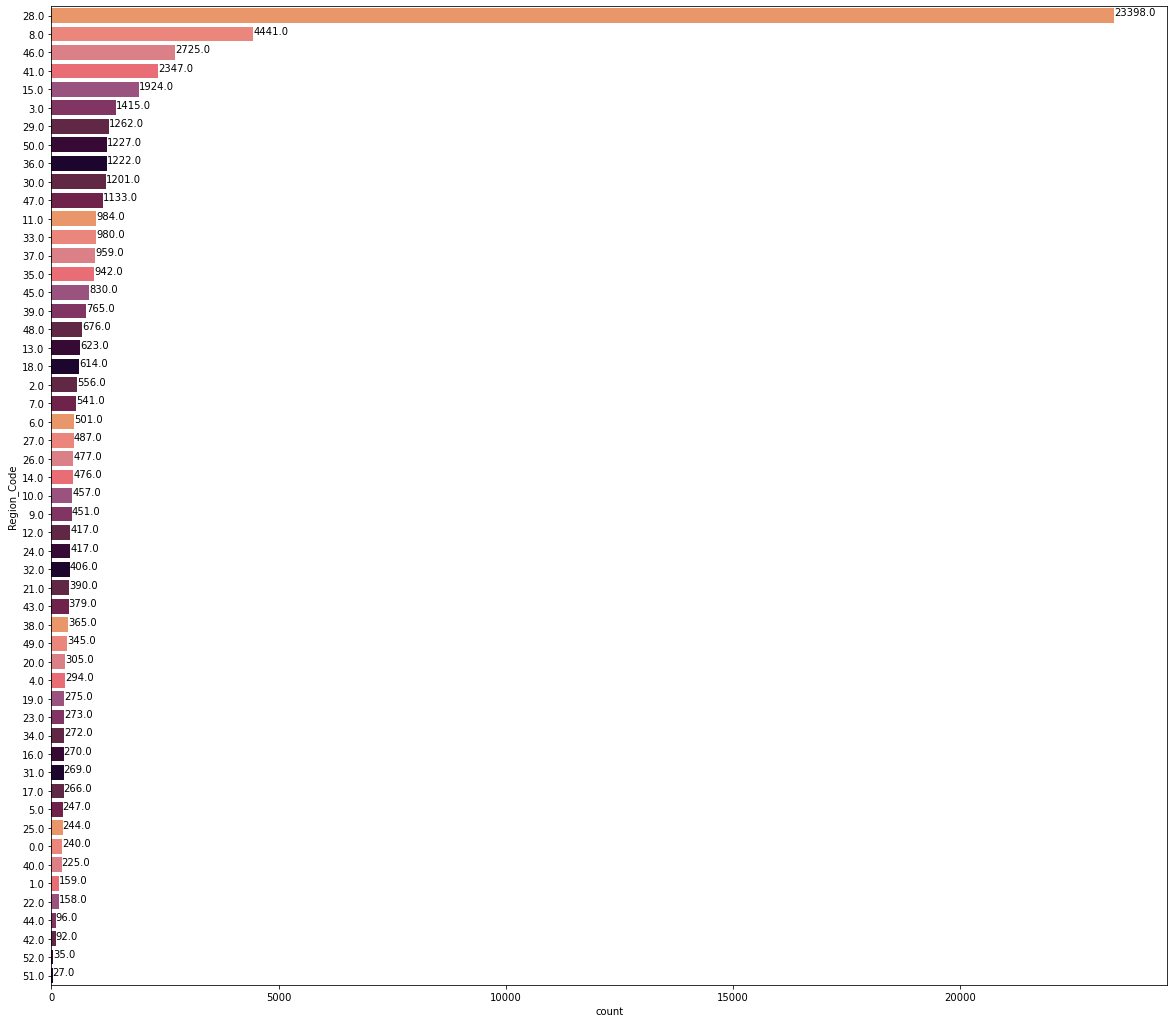

In [29]:
'''
Drawing bar plot for number of female have damaged their cars among regions
'''
df_t1 = train.loc[((train['Gender'] == 1) & (train['Vehicle_Damage'] == 1))]
df_t1.dropna( subset = ['Region_Code'] , inplace = True)
plt.figure(figsize = (20,18))
regions_List = sorted(list(df_t1['Region_Code'].value_counts()), reverse= True)
ax = sns.countplot( y = 'Region_Code', order = df_t1['Region_Code'].value_counts().index , data = df_t1, palette = ["#fe9055" , "#fe766a" , "#eb717c" , "#fe5862" , "#a54780" , "#8d2865" ,  "#6b1e47" , "#3d033b" , "#1e0034","#6b1e47" ,"#7b174a"] )
for p in ax.patches:
        percentage = '{:.1f}'.format( p.get_width() )
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/ 2
        ax.annotate(percentage , (x, y))

In [30]:
"""
Checking the average annual premium regarding gender
"""
train.groupby('Gender')[['Annual_Premium']].mean()

,Annual_Premium
Gender,
0,30750.771998
1,30638.600809


## Modeling 

# GaussianNB

In [52]:
"""
Fist Model, Random Sampling , naive bayes , without feature selection
"""
sample_0 = train[(train.Response == 0)].sample(49959 , random_state = 123 )#frac = 0.19541263169601242)
sample_1 = train[(train.Response == 1)]
balanced = pd.concat([sample_0 , sample_1])
X, y = balanced.iloc[:,:-1] , balanced.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test2 = test.copy()
pred = gnb.predict(test2)
test2['Response'] = pred
#dir(gnb)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
# sub = test2[['id','Response']]
# sub.to_csv('sub1.csv' , index = False)

In [32]:
dftrain = train[['Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

sample_0 = dftrain[(dftrain.Response == 0)].sample(49959 , random_state = 123 )#frac = 0.19541263169601242)
sample_1 = dftrain[(dftrain.Response == 1)]
balanced = pd.concat([sample_0 , sample_1])
X, y = balanced[['Previously_Insured','Vehicle_Age','Vehicle_Damage']] , balanced.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test2 = test[['Previously_Insured','Vehicle_Age','Vehicle_Damage']].copy()
pred = gnb.predict(test2)
test2['Response'] = pred
#dir(gnb)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     14996
           1       0.73      0.98      0.84     14980

    accuracy                           0.81     29976
   macro avg       0.85      0.81      0.81     29976
weighted avg       0.85      0.81      0.81     29976

[[ 9630  5366]
 [  237 14743]]


In [151]:
from imblearn.combine import SMOTETomek, SMOTEENN
dftrain = train[['Previously_Insured','Vehicle_Damage','Response']]
X, y = dftrain[['Previously_Insured','Vehicle_Damage']] , dftrain.Response
smote = SMOTEENN(random_state = 0)
smote.fit(X, y)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test2 = test[['Previously_Insured','Vehicle_Damage']].copy()
pred = gnb.predict(test2)
test2['Response'] = pred
#dir(gnb)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))

In [147]:
dftrain = train[['Previously_Insured','Vehicle_Age','Vehicle_Damage','Response','Age','Gender']]

sample_0 = dftrain[(dftrain.Response == 0)].sample(49959 , random_state = 44 )#frac = 0.19541263169601242)
sample_1 = dftrain[(dftrain.Response == 1)]
balanced = pd.concat([sample_0 , sample_1])
X, y = balanced[['Previously_Insured','Vehicle_Age','Vehicle_Damage','Age','Gender']] , balanced.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test2 = test[['Previously_Insured','Vehicle_Age','Vehicle_Damage','Age','Gender']].copy()
pred = gnb.predict(test2)
test2['Response'] = pred
#dir(gnb)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))

# SVM

In [138]:
dftrain = train[['Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

sample_0 = dftrain[(dftrain.Response == 0)].sample(49959 , random_state = 123 )#frac = 0.19541263169601242)
sample_1 = dftrain[(dftrain.Response == 1)]
balanced = pd.concat([sample_0 , sample_1])
X, y = balanced[['Previously_Insured','Vehicle_Age','Vehicle_Damage']] , balanced.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gnb = svm.SVC()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
test2 = test[['Previously_Insured','Vehicle_Age','Vehicle_Damage']].copy()
pred = gnb.predict(test2)
test2['Response'] = pred
#dir(gnb)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))

In [164]:
"""
Second Model,SVC evaluated on imbalanced dataset with SMOTE oversampling
"""
X, y = train.iloc[:,:-1] , train.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
k_values = [1, 2, 3, 4]
#for k in k_values:
        # define pipeline
model = svm.SVC()
over = SMOTE(sampling_strategy = 0.3, k_neighbors = 3)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [('over', over), ('under', under),('model', model)]# 
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1 , error_score='raise')
score = mean(scores)
print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
x_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_pred = model.fit(x_train_res, y_train_res).predict(X_test)
test2 = test.copy()
pred = model.predict(test2)
test2['Response'] = pred
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
sub = test2[['id','Response']]
sub.to_csv('sub2.csv' , index = False)

In [126]:
"""
SVC Model, SVC evaluated on imbalanced dataset with SMOTE oversampling
"""
parameters = {'C': [1,10,100], 'kernel': ['linear' , 'rbf' , 'poly'],
          'gamma': [0.001, 0.01] }
X, y = train.iloc[:,:-1] , train.Response
k_values = [2, 3]
for k in k_values:
        # define pipeline
        model = svm.SVC()
        over = SMOTE(sampling_strategy = 0.3, k_neighbors = k)
        #under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('over', over),  ('model', model)]
        pipeline = Pipeline(steps=steps)
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 1)
        scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1 , error_score = 'raise')
        score = mean(scores)
        print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
        grid = GridSearchCV(estimator = model, param_grid = parameters , scoring = 'f1')   
        x_train_res, y_train_res = over.fit_resample(X_train, y_train)
clf =  grid.fit(x_train_res, y_train_res)
y_pred =  clf.predict(X_test)
test2 = test.copy()
pred = model.predict(test2)
test2['Response'] = pred
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
sub = test2[['id','Response']]
sub.to_csv('sub3.csv' , index = False)

## DecisionTreeClassifier

In [152]:
"""
Second Model, decision tree evaluated on imbalanced dataset with SMOTE oversampling
"""
X, y = train.iloc[:,:-1] , train.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
        # define pipeline
        model = DecisionTreeClassifier()
        over = SMOTE(sampling_strategy = 0.3, k_neighbors = k)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('over', over), ('under', under),('model', model)]# 
        pipeline = Pipeline(steps=steps)
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
        scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1 , error_score='raise')
        score = mean(scores)
        print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
        x_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_pred = model.fit(x_train_res, y_train_res).predict(X_test)
test2 = test.copy()
pred = model.predict(test2)
test2['Response'] = pred
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
sub = test2[['id','Response']]
sub.to_csv('sub2.csv' , index = False)

In [153]:
"""
Second Model, decision tree evaluated on imbalanced dataset with SMOTE oversampling
"""
X, y = train.iloc[:,:-1] , train.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
        # define pipeline
        model = DecisionTreeClassifier(max_depth = 5,criterion = 'entropy' )
        over = SMOTE(sampling_strategy = 0.3, k_neighbors = k)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('over', over), ('under', under),('model', model)]# 
        pipeline = Pipeline(steps=steps)
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
        scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1 , error_score='raise')
        score = mean(scores)
        print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
        x_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_pred = model.fit(x_train_res, y_train_res).predict(X_test)
test2 = test.copy()
pred = model.predict(test2)
test2['Response'] = pred
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
sub = test2[['id','Response']]
sub.to_csv('sub2.csv' , index = False)

In [158]:
"""
3rd Model, decision tree evaluated on imbalanced dataset with SMOTE oversampling
"""
X, y = train.iloc[:,:-1] , train.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
        # define pipeline
        model = DecisionTreeClassifier(max_depth = 6,criterion = 'entropy' )
        over = SMOTE(sampling_strategy = 0.3, k_neighbors = k)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        steps = [('over', over), ('under', under),('model', model)]# 
        pipeline = Pipeline(steps=steps)
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
        scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1 , error_score='raise')
        score = mean(scores)
        print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
        x_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_pred = model.fit(x_train_res, y_train_res).predict(X_test)
test2 = test.copy()
pred = model.predict(test2)
test2['Response'] = pred
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
sub = test2[['id','Response']]
sub.to_csv('sub2.csv' , index = False)

In [156]:
# sub.to_csv('sub3.csv' , index = False)